In [1]:
from pandas_datareader import data as wb
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from datetime import date
import datetime
from scipy.stats import norm

In [2]:
end_date = str(date.today() - datetime.timedelta(days=1))
ini_date = date(2017,1,1)
idx = pd.date_range(ini_date, end_date)
print(ini_date,'-',end_date)

2017-01-01 - 2021-11-03


Bitcoin é uma criptomoeda descentralizada, sendo um dinheiro eletrônico para transações ponto a ponto. Bitcoin é considerada a primeira moeda digital mundial descentralizada, constituindo um sistema econômico alternativo, e responsável pelo ressurgimento do sistema bancário livre.

O Bitcoin permite transações financeiras sem intermediários, mas verificadas por todos usuários (nodos) da rede, que são gravadas em um banco de dados distribuídos, chamado de blockchain, uma rede descentralizada, isto é, uma estrutura sem uma entidade administradora central, o que torna inviável qualquer autoridade financeira ou governamental manipular a emissão e o valor da criptomoeda ou induzir a inflação com a produção de mais dinheiro. No entanto, grandes movimentos especulativos de oferta e demanda influenciam na oscilação de seu valor no mercado de câmbio, sendo definido livremente durante as 24 horas do dia.

No âmbito financeiro e contabilístico internacional, semelhante ao ouro, o Bitcoin pode ser enquadrado em alguns termos: ativo especulativo (bem material), dinheiro commodity (mercadoria), unidade de conta (bem de troca) - por ser empregado como meio de troca e por possuir uma escassez relativa além de cotação própri.

Ethereum é uma plataforma descentralizada capaz de executar contratos inteligentes e aplicações descentralizadas usando a tecnologia blockchain: Operações que são feitas automaticamente quando certas condições são cumpridas sem qualquer possibilidade de censura, fraude ou interferência de terceiros, isso porque o contrato é imutável.

Além disso, ela é usada nas operações de sua própria moeda, o Ether, e também de outros ativos que usam este sistema. O Ether foi criado para ser um ativo para recompensar os desenvolvedores que usam a plataforma Ethereum para seus projetos. Mesmo assim, o Ethereum é uma das três moedas digitais mais negociadas do mundo.

A Binance é uma bolsa global de criptomoedas que fornece uma plataforma para a negociação de mais de 100 moedas criptográficas. Desde o início de 2018, a Binance é considerada a maior exchange de criptomoedas do mundo em termos de volume de negociação.

A Binance Coin é uma criptomoeda que é emitida através da mineração e, assim como o Bitcoin, ela tem a sua emissão limitada, podendo, nesse caso, chegar a um máximo de 200 milhões de unidades. No entanto, a Binance já anunciou que irá gradualmente eliminar 50% dessa quantidade por meio da sua política de queima de moedas, eventualmente reduzindo a sua disponibilidade para 100 milhões de unidades

Binance Coin foi criada especialmente para ser usada dentro da plataforma da exchange, com a vantagem de permitir que o usuário tenha descontos nas taxas. Porém, com o tempo, ela passou a ser aceita por algumas outras empresas que, apesar de não serem muitas, já contribuem para engrandecer o seu valor. Usos que vão além da plataforma incluem trading (troca dessa criptomoeda por outra), pagamentos, investimentos e até mesmo reserva de hotéis em alguns sites estrangeiros.

Cardano é uma plataforma de computação distribuída que executa o blockchain para a criptomoeda ADA. O projeto tem como objetivo executar contratos inteligentes, aplicativos descentralizados, cadeias laterais, computação multipartidária, e metadados.

As promessas desta criptomoeda incluem interoperabilidade com outras redes, alta capacidade de transações, e facilidade para movimentar criptoativos e aplicações na rede, reduzindo seu custo operacional e capacidade dos validadores.

Em primeiro lugar, é preciso entender que Cardano ainda está em fase inicial de implementação. Os smart contracts habilitados atualmente permitem apenas a criação de criptoativos simples, incluindo os tokens não-fungíveis (NFT).

Cardano utiliza menos recursos para executar as aplicações descentralizadas, o que torna as transações mais baratas.
A rede já nasce preparada de forma nativa para interoperabilidade com outras blockchains.
A capacidade teórica de processamento é maior que sua concorrente Ethereum.

S&P 500, trata-se de um índice composto por quinhentos ativos (ações) cotados nas bolsas de NYSE ou NASDAQ, qualificados devido ao seu tamanho de mercado, sua liquidez e sua representação de grupo industrial. É (S&P 500) um índice ponderado de valor de mercado (valor do ativo multiplicado pelo número de ações em circulação) com o peso de cada ativo no índice proporcional ao seu preço de mercado.

O ticker do S&P 500 é ^GSPC.

Os componentes do S&P 500 são selecionados por um comitê. Ao considerar a elegibilidade de uma nova adição, o comitê avalia o mérito da empresa usando oito critérios principais: Capitalização de mercado, liquidez, domicílio, flutuação pública, classificação setorial, viabilidade financeira e período de tempo negociado publicamente e bolsa de valores.

Extraindo dados

In [5]:
tickers = {'BTC-USD':None,
           'ETH-USD':None,
           'BNB-USD':None,
           'ADA-USD':None,
           '^GSPC':None}

for ticker in tickers.keys():
    df = wb.DataReader(ticker, data_source='yahoo', end=end_date)
    if ini_date<df.index[0]:
        ini_date=df.index[0]
    #print(df[df.index.duplicated()])
    df = df.groupby(['Date']).mean()
    tickers[ticker] = df.reindex(idx).fillna(method='ffill')

Analise dos dados

In [8]:
tickers['BTC-USD']

,High,Low,Open,Close,Volume,Adj Close
2017-01-01,1003.080017,958.698975,963.658020,998.325012,1.477750e+08,998.325012
2017-01-02,1031.390015,996.702026,998.617004,1021.750000,2.221850e+08,1021.750000
2017-01-03,1044.079956,1021.599976,1021.599976,1043.839966,1.851680e+08,1043.839966
2017-01-04,1159.420044,1044.400024,1044.400024,1154.729980,3.449460e+08,1154.729980
2017-01-05,1191.099976,910.416992,1156.729980,1013.380005,5.101990e+08,1013.380005
...,...,...,...,...,...,...
2021-10-30,62406.171875,60074.328125,61850.488281,61318.957031,3.224120e+10,61318.957031
2021-10-31,62406.171875,60074.328125,61850.488281,61318.957031,3.224120e+10,61318.957031
2021-11-01,62419.003906,59695.183594,61320.449219,61004.406250,3.615057e+10,61004.406250
2021-11-02,64242.792969,60673.054688,60963.253906,63226.402344,3.774667e+10,63226.402344


In [9]:
tickers['ETH-USD']

,High,Low,Open,Close,Volume,Adj Close
2017-01-01,8.471230,7.982310,7.982310,8.172570,1.473170e+07,8.172570
2017-01-02,8.436330,8.054410,8.170870,8.378510,1.457960e+07,8.378510
2017-01-03,9.996800,8.317170,8.374580,9.725250,3.362520e+07,9.725250
2017-01-04,11.276400,9.559810,9.709290,11.251600,4.105120e+07,11.251600
2017-01-05,11.890900,9.402680,11.286800,10.254400,4.155740e+07,10.254400
...,...,...,...,...,...,...
2021-10-30,4394.449707,4179.016113,4322.744141,4288.074219,1.749816e+10,4288.074219
2021-10-31,4394.449707,4179.016113,4322.744141,4288.074219,1.749816e+10,4288.074219
2021-11-01,4377.322266,4160.966797,4288.217285,4324.626953,1.798529e+10,4324.626953
2021-11-02,4599.948242,4288.686523,4322.500977,4584.798828,2.079445e+10,4584.798828


In [10]:
tickers['BNB-USD']

,High,Low,Open,Close,Volume,Adj Close
2017-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-05,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-10-30,534.770935,510.565460,528.547302,524.364441,2.076290e+09,524.364441
2021-10-31,534.770935,510.565460,528.547302,524.364441,2.076290e+09,524.364441
2021-11-01,552.073669,512.176270,524.738220,551.255920,2.535580e+09,551.255920
2021-11-02,564.022705,538.399963,551.747559,554.447632,2.401108e+09,554.447632


In [11]:
tickers['ADA-USD']

,High,Low,Open,Close,Volume,Adj Close
2017-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-05,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-10-30,2.022236,1.923054,1.955862,1.965026,2.446177e+09,1.965026
2021-10-31,2.022236,1.923054,1.955862,1.965026,2.446177e+09,1.965026
2021-11-01,2.015316,1.917960,1.964962,1.950002,2.649339e+09,1.950002
2021-11-02,1.996540,1.934827,1.949818,1.971377,2.459980e+09,1.971377


In [12]:
tickers['^GSPC']

,High,Low,Open,Close,Volume,Adj Close
2017-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03,2263.879883,2245.129883,2251.570068,2257.830078,3.770530e+09,2257.830078
2017-01-04,2272.820068,2261.600098,2261.600098,2270.750000,3.764890e+09,2270.750000
2017-01-05,2271.500000,2260.449951,2268.179932,2269.000000,3.761820e+09,2269.000000
...,...,...,...,...,...,...
2021-10-30,4608.080078,4567.589844,4572.870117,4605.379883,3.632260e+09,4605.379883
2021-10-31,4608.080078,4567.589844,4572.870117,4605.379883,3.632260e+09,4605.379883
2021-11-01,4620.339844,4595.060059,4610.620117,4613.669922,2.924000e+09,4613.669922
2021-11-02,4635.149902,4613.339844,4613.339844,4630.649902,3.309690e+09,4630.649902


In [31]:
for ticker,df in tickers.items():
    print('\n'*2,'-'*45,ticker,'-'*45,)
    print(df.describe(include='all').astype('int32'))



 --------------------------------------------- BTC-USD ---------------------------------------------
        High    Low   Open  Close      Volume  Adj Close  simple_return
count   1768   1768   1768   1768        1768       1768           1767
mean   14604  13770  14201  14235 -2147483648      14235              0
std    16092  15117  15628  15664 -2147483648      15664              0
min      823    755    775    777    60851700        777              0
25%     5409   5210   5296   5302 -2147483648       5302              0
50%     8620   8185   8376   8399 -2147483648       8399              0
75%    12034  11558  11787  11808 -2147483648      11808              0
max    66930  63610  66002  65992 -2147483648      65992              0


 --------------------------------------------- ETH-USD ---------------------------------------------
       High   Low  Open  Close      Volume  Adj Close  simple_return
count  1768  1768  1768   1768        1768       1768           1767
mean    

In [ ]:
Calcular taxa de retorno simples

In [ ]:
for ticker,df in tickers.items():
    df['simple_return'] = (df['Adj Close']/df['Adj Close'].shift(1))-1

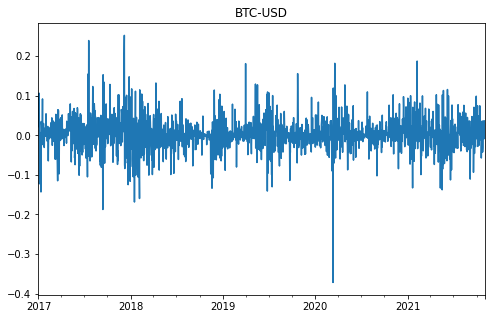

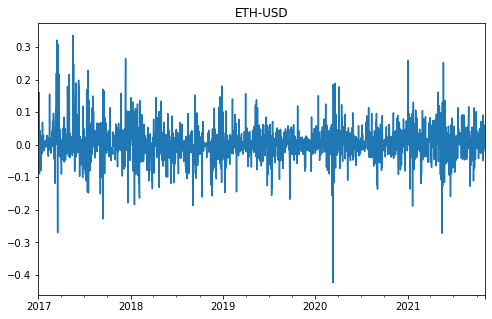

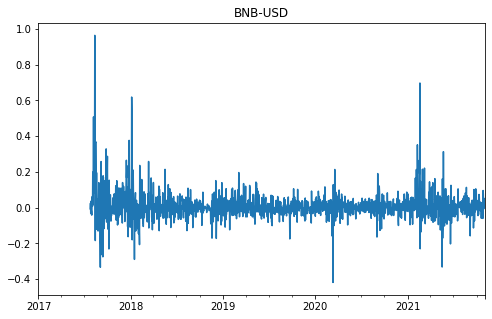

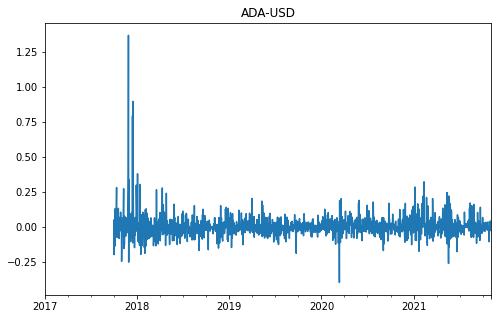

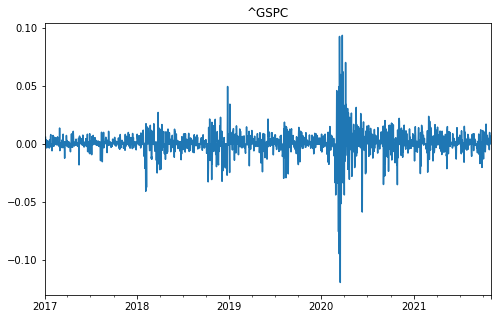

In [20]:
for ticker,df in tickers.items():
    df['simple_return'].plot(figsize = (8,5))
    plt.title(ticker)
    plt.show()

In [ ]:
Taxa Anual de Retorno Simples

In [32]:
for ticker,df in tickers.items():
    if ticker == '^GSPC':
        days = 250
    else:
        days = 365
    avg = str(round(df['simple_return'].mean()*days*100,2))+'%' #365 -> criptomoedas,  250 -> Ações
    print(ticker,'-',avg)

Taxa Anual de Retorno Simples:

BTC-USD - 118.44%
ETH-USD - 189.98%
BNB-USD - 301.61%
ADA-USD - 210.63%
^GSPC - 11.56%


In [ ]:
Calcular taxa de retorno logaritmica

In [33]:
for ticker,df in tickers.items():
    df['log_return'] = np.log(df['Adj Close']/df['Adj Close'].shift(1))

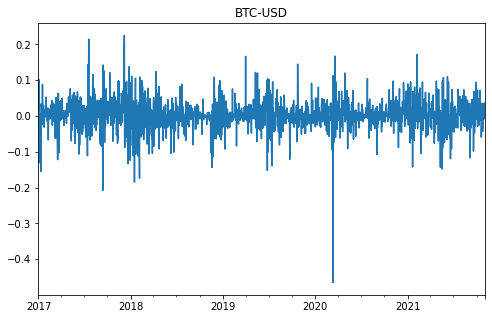

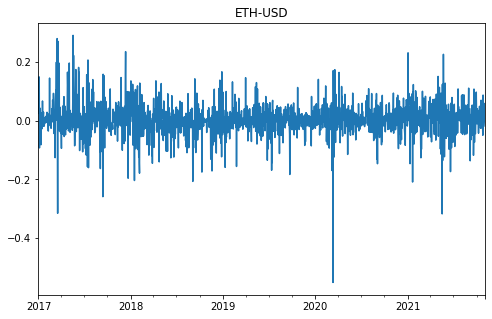

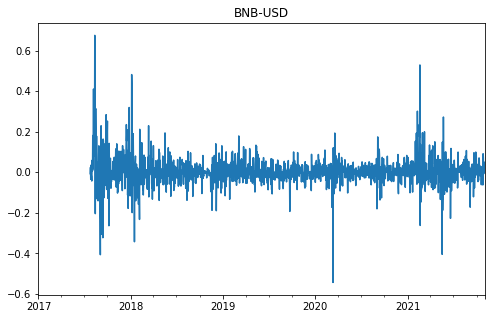

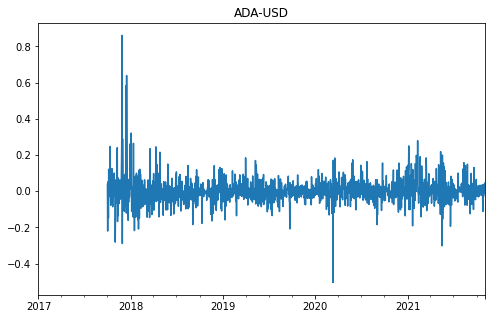

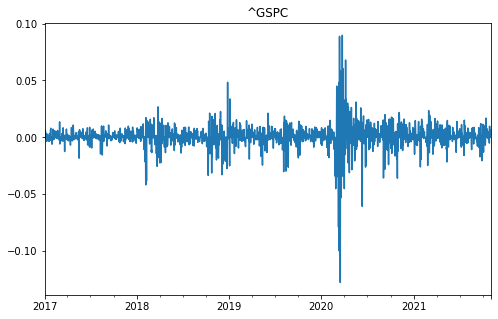

In [34]:
for ticker,df in tickers.items():
    df['log_return'].plot(figsize = (8,5))
    plt.title(ticker)
    plt.show()

In [ ]:
Taxa Anual de Retorno Logarítmico

In [35]:
for ticker,df in tickers.items():
    if ticker == '^GSPC':
        days = 250
    else:
        days = 365
    avg = str(round(df['log_return'].mean()*days*100,2))+'%' #365 -> criptomoedas,  250 -> Ações
    print(ticker,'-',avg)

BTC-USD - 85.61%
ETH-USD - 130.85%
BNB-USD - 200.57%
ADA-USD - 107.78%
^GSPC - 10.27%


In [ ]:
Taxa Anual de Volatilidade

In [36]:
for ticker,df in tickers.items():
    if ticker == '^GSPC':
        days = 250
    else:
        days = 365
    std = str(round(((df['log_return'].std()*days)**0.5)*100,2))+'%' #365 -> criptomoedas,  250 -> Ações
    print(ticker,'-',std)#.rjust(15)

BTC-USD - 393.86%
ETH-USD - 455.64%
BNB-USD - 515.98%
ADA-USD - 515.56%
^GSPC - 159.57%


In [ ]:
Removendo dados anteriores em relação ao ticker mais recente

In [37]:
result = pd.DataFrame()
for ticker,df in tickers.items():
    result[ticker] = df.loc[df.index>=ini_date]['Adj Close']

In [38]:
result

,BTC-USD,ETH-USD,BNB-USD,ADA-USD,^GSPC
2017-09-30,4403.740234,302.337006,1.526530,0.024969,2519.360107
2017-10-01,4409.319824,297.475006,1.964670,0.025932,2519.360107
2017-10-02,4317.479980,292.463013,1.820700,0.020816,2529.120117
2017-10-03,4229.359863,292.657990,1.601480,0.021931,2534.580078
2017-10-04,4328.410156,295.863007,1.678490,0.021489,2537.739990
...,...,...,...,...,...
2021-10-30,61318.957031,4288.074219,524.364441,1.965026,4605.379883
2021-10-31,61318.957031,4288.074219,524.364441,1.965026,4605.379883
2021-11-01,61004.406250,4324.626953,551.255920,1.950002,4613.669922
2021-11-02,63226.402344,4584.798828,554.447632,1.971377,4630.649902


In [ ]:
Analise das series temporais

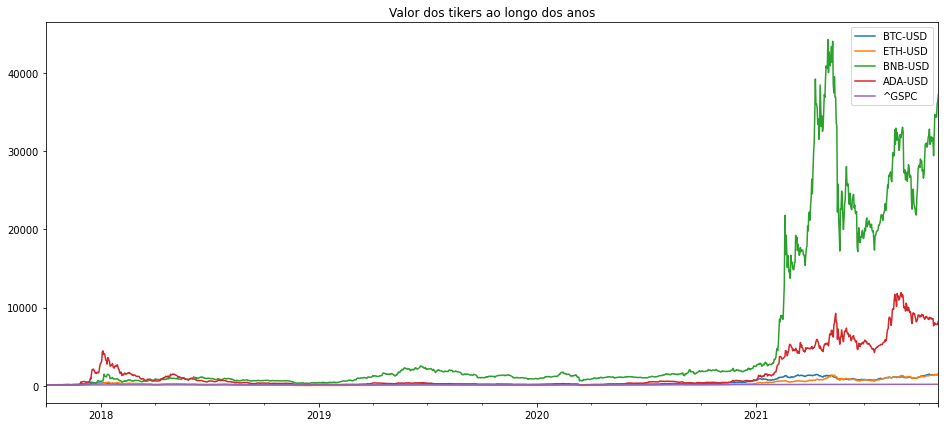

In [39]:
(result / result.iloc[0] * 100).plot(figsize = (16,7))
plt.title('Valor dos tikers ao longo dos anos')
plt.show()

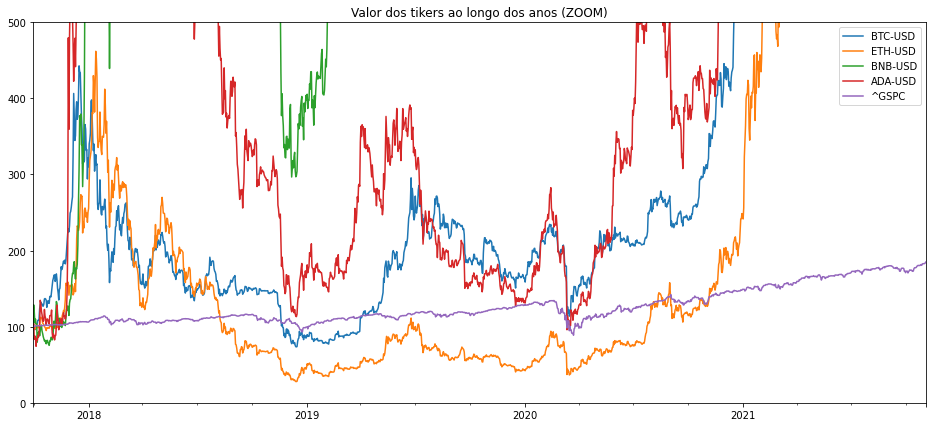

In [43]:
(result / result.iloc[0] * 100).plot(figsize = (16,7))
plt.ylim([0, 500])
plt.title('Valor dos tikers ao longo dos anos (ZOOM)')
plt.show()

In [18]:
result = pd.DataFrame()
for ticker,df in tickers.items():
    result[ticker] = df.loc[df.index>=ini_date]['log_return']

In [19]:
result.corr()

,BTC-USD,ETH-USD,BNB-USD,ADA-USD,^GSPC
BTC-USD,1.000000,0.759952,0.628165,0.575919,0.134082
ETH-USD,0.759952,1.000000,0.629906,0.656214,0.136449
BNB-USD,0.628165,0.629906,1.000000,0.510953,0.124731
ADA-USD,0.575919,0.656214,0.510953,1.000000,0.100207
^GSPC,0.134082,0.136449,0.124731,0.100207,1.000000


In [20]:
weights = np.array([0.60,0.25,0.10,0.03,0.02])

In [21]:
annual_return = result.mean()*365

In [22]:
weighted_annual_return = np.dot(annual_return,weights)
print(str(round(weighted_annual_return*100,2))+'%')

74.19%


In [23]:
portfolio_variance = np.dot(weights.T, np.dot(result.cov()*365, weights))
print(str(round(portfolio_variance*100,2))+'%')

64.93%


In [24]:
portfolio_volatility = (np.dot(weights.T, np.dot(result.cov()*365, weights))) ** 0.5
print(str(round(portfolio_volatility*100,2))+'%')

80.58%


In [25]:
diversifiable_risk = portfolio_variance
for i,ticker in enumerate(result.columns):
    diversifiable_risk -= weights[i] ** 2 * (result[ticker].var()*365)
print(str(round(diversifiable_risk*100,2))+'%')

33.92%


In [26]:
non_diversifiable_risk = 0
for i,ticker in enumerate(result.columns):
    non_diversifiable_risk += weights[i] ** 2 * (result[ticker].var()*365)
print(str(round(non_diversifiable_risk*100,2))+'%')

31.01%


In [27]:
test = result[['ETH-USD','BNB-USD']].copy()
test

,ETH-USD,BNB-USD
2017-09-30,0.002888,0.173344
2017-10-01,-0.016212,0.252327
2017-10-02,-0.016992,-0.076103
2017-10-03,0.000666,-0.128293
2017-10-04,0.010892,0.046966
...,...,...
2021-10-30,-0.008725,-0.006760
2021-10-31,0.000000,0.000000
2021-11-01,0.008488,0.050012
2021-11-02,0.058420,0.005773


In [28]:
weights = np.random.random(len(test.columns))
weights /= np.sum(weights)
print(weights)
print(sum(weights))

[0.1702226 0.8297774]
1.0


In [29]:
expected_portfolio_return = np.sum(weights * test.mean())*365
expected_portfolio_return

1.3468859018012607

In [30]:
expected_portfolio_variance = np.dot(weights.T, np.dot(test.cov()*365, weights))
expected_portfolio_variance

1.2847825782257316

In [31]:
expected_portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(test.cov()*365, weights)))
expected_portfolio_volatility

1.133482500185041

In [32]:
def generate_portfolio(df,columns):
    expected_portfolio_return_list = []
    expected_portfolio_volatility_list = []
    
    for i in range(1000):
        weights = np.random.random(len(df[columns].columns))
        weights /= np.sum(weights)
        if ticker == '^GSPC':
            days = 250
        else:
            days = 365
        expected_portfolio_return_list += [np.sum(weights * df[columns].mean())*days]
        expected_portfolio_volatility_list += [np.sqrt(np.dot(weights.T, np.dot(df[columns].cov()*days, weights)))]
    
    portfolios = pd.DataFrame({'Return': np.array(expected_portfolio_return_list),
                               'Volatility': np.array(expected_portfolio_volatility_list)})
    return portfolios

Text(0, 0.5, 'Expected Return')

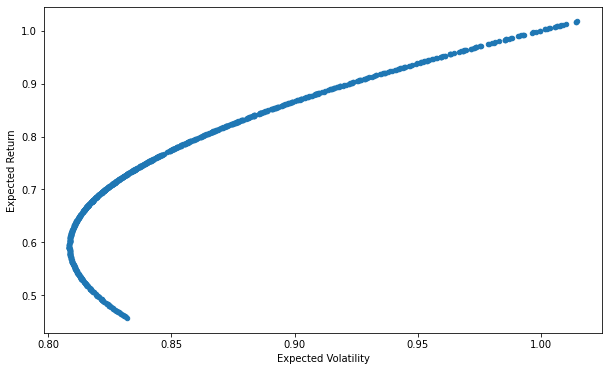

In [33]:
portfolios = generate_portfolio(result,['ETH-USD','BNB-USD'])
portfolios.plot(x='Volatility',y='Return',kind='scatter',figsize=(10,6))
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

In [34]:
financial_analysis = {}
financial_analysis['Beta'] = {}

covariance_GSPC = (result.cov() * 365).loc['^GSPC']
for i,v in zip(covariance_GSPC.index,covariance_GSPC.values):
    if i!='^GSPC':
        beta = v / (result['^GSPC'].var() * 250)
        print('Beta',i,'=',beta)
        financial_analysis['Beta'].update({i:beta})

Beta BTC-USD = 0.7479517870159489
Beta ETH-USD = 0.9576516549752595
Beta BNB-USD = 1.0675018350577108
Beta ADA-USD = 0.9730856486703551


In [35]:
financial_analysis['CAPM'] = {}
for i,v in financial_analysis['Beta'].items():
    CAPM = (2.5/100)+v*(5/100)
    print('CAPM',i,'=',CAPM)
    financial_analysis['CAPM'].update({i:CAPM})

CAPM BTC-USD = 0.06239758935079745
CAPM ETH-USD = 0.07288258274876297
CAPM BNB-USD = 0.07837509175288554
CAPM ADA-USD = 0.07365428243351776


In [36]:
financial_analysis['Sharpe'] = {}
for i,v in financial_analysis['CAPM'].items():
    sharpe = (v-(2.5/100)) / (result[i].std() * 365 ** 0.5)
    print('Sharpe',i,'=',sharpe)
    financial_analysis['Sharpe'].update({i:sharpe})

Sharpe BTC-USD = 0.04677715552559806
Sharpe ETH-USD = 0.04760269009380896
Sharpe BNB-USD = 0.04351489593026724
Sharpe ADA-USD = 0.03497087702572945


In [37]:
result = pd.DataFrame()
result['BTC-USD'] = tickers['BTC-USD']['Adj Close']

In [38]:
log_returns = np.log(1+result.pct_change())

In [39]:
drift = log_returns.mean() - (0.5 * log_returns.var())
drift

BTC-USD    0.001442
dtype: float64

In [40]:
stdev = log_returns.std()
stdev

BTC-USD    0.0425
dtype: float64

In [41]:
norm.ppf(0.95)

1.6448536269514722

In [42]:
x = np.random.rand(10,2)
x

array([[0.25224711, 0.38632956],
       [0.36807964, 0.67345967],
       [0.67260442, 0.0549777 ],
       [0.81261555, 0.23081081],
       [0.35043594, 0.73152727],
       [0.79085821, 0.8721543 ],
       [0.40721828, 0.53248436],
       [0.04680473, 0.28203071],
       [0.56117958, 0.24506397],
       [0.14171778, 0.93198891]])

In [43]:
Z = norm.ppf(x)
Z

array([[-0.66743515, -0.28889841],
       [-0.33694379,  0.44948663],
       [ 0.44711621, -1.59839362],
       [ 0.88757592, -0.73617923],
       [-0.38414378,  0.61743861],
       [ 0.80940264,  1.13663381],
       [-0.23470648,  0.08151642],
       [-1.67665757, -0.57681947],
       [ 0.15396054, -0.69010536],
       [-1.07263355,  1.49076888]])

In [44]:
t_intervals = 1000
iterations = 10

daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals,iterations)))
daily_returns

array([[1.03075302, 1.0257498 , 1.02950233, ..., 1.04733179, 1.01615794,
        1.05221123],
       [1.06111433, 0.95356259, 1.01965832, ..., 1.04307382, 0.96451984,
        0.99426506],
       [1.01831253, 1.00595283, 0.9350665 , ..., 1.046861  , 1.00373245,
        0.96760314],
       ...,
       [0.98756731, 1.03759688, 1.0286654 , ..., 1.01972185, 1.05896608,
        0.97855801],
       [0.98188992, 0.92940872, 1.02659779, ..., 0.98941097, 0.98870431,
        0.97685426],
       [1.01212241, 0.94223546, 1.05234963, ..., 1.03866881, 1.02027945,
        0.95442872]])

In [45]:
S0 = result.iloc[-1]
S0

BTC-USD    62970.046875
Name: 2021-11-03 00:00:00, dtype: float64

In [46]:
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [47]:
price_list[0] = S0
price_list

array([[62970.046875, 62970.046875, 62970.046875, ..., 62970.046875,
        62970.046875, 62970.046875],
       [    0.      ,     0.      ,     0.      , ...,     0.      ,
            0.      ,     0.      ],
       [    0.      ,     0.      ,     0.      , ...,     0.      ,
            0.      ,     0.      ],
       ...,
       [    0.      ,     0.      ,     0.      , ...,     0.      ,
            0.      ,     0.      ],
       [    0.      ,     0.      ,     0.      , ...,     0.      ,
            0.      ,     0.      ],
       [    0.      ,     0.      ,     0.      , ...,     0.      ,
            0.      ,     0.      ]])

In [48]:
for t in range(1,t_intervals):
    price_list[t] = price_list[t-1] * daily_returns[t]

In [49]:
price_list

array([[  62970.046875  ,   62970.046875  ,   62970.046875  , ...,
          62970.046875  ,   62970.046875  ,   62970.046875  ],
       [  66818.41917542,   60045.88120668,   64207.93217048, ...,
          65682.40747033,   60735.85929166,   62608.91770322],
       [  68042.03328386,   60403.32400358,   60038.68614687, ...,
          68760.35088315,   60962.5525623 ,   60580.5852555 ],
       ...,
       [ 225966.460062  ,  126277.95388763, 1052407.97484127, ...,
          25945.08161159,   24887.26657698,  309536.71621797],
       [ 221874.1896355 ,  117363.83183178, 1080399.70134434, ...,
          25670.34836217,   24606.14782026,  302372.26016796],
       [ 224563.84003385,  110584.36364908, 1136958.22757899, ...,
          26662.9901685 ,   25105.14693889,  288592.76927783]])

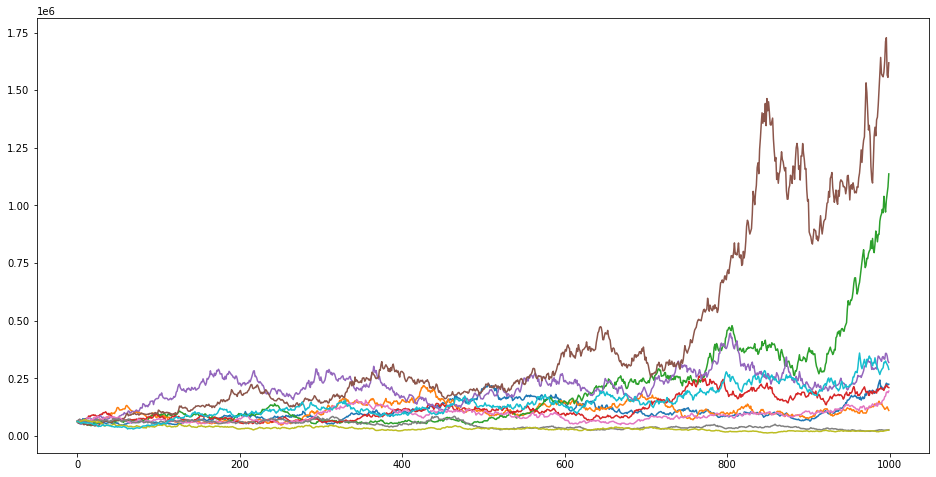

In [50]:
plt.figure(figsize=(16,8))
plt.plot(price_list);

In [51]:
r = 0.025

In [52]:
stdev = (log_returns.std()*365 **0.5).values
stdev

array([0.8119617])

In [53]:
T = 1.0
t_intervals = 365
delta_t = T/t_intervals

iterations = 10000

In [54]:
Z = np.random.standard_normal((t_intervals+1,iterations))
S = np.zeros_like(Z)
S0 = result.iloc[-1]
S[0] = S0

In [55]:
for t in range(1, t_intervals+1):
    S[t] = S[t-1] * np.exp((r - 0.5 * stdev ** 2) * delta_t + stdev * delta_t ** 0.5 * Z[t])

In [56]:
S

array([[ 62970.046875  ,  62970.046875  ,  62970.046875  , ...,
         62970.046875  ,  62970.046875  ,  62970.046875  ],
       [ 69313.44585932,  66450.82542506,  59859.73439088, ...,
         60488.43732942,  59784.62085978,  59151.28935743],
       [ 67883.18333407,  63502.99293596,  58672.02444813, ...,
         57172.74129864,  56582.29872241,  56695.65222361],
       ...,
       [ 12666.90398504,  80578.34687051,  21021.34924003, ...,
        127544.70136937,  73035.97413117,  82834.63013819],
       [ 12039.67938632,  75156.24937094,  21186.15373786, ...,
        134408.08361577,  73625.3602477 ,  83688.62918679],
       [ 12526.72470765,  77282.14605561,  21001.2241636 , ...,
        139128.96550012,  68113.4259109 ,  79337.573179  ]])

In [57]:
S.shape

(366, 10000)

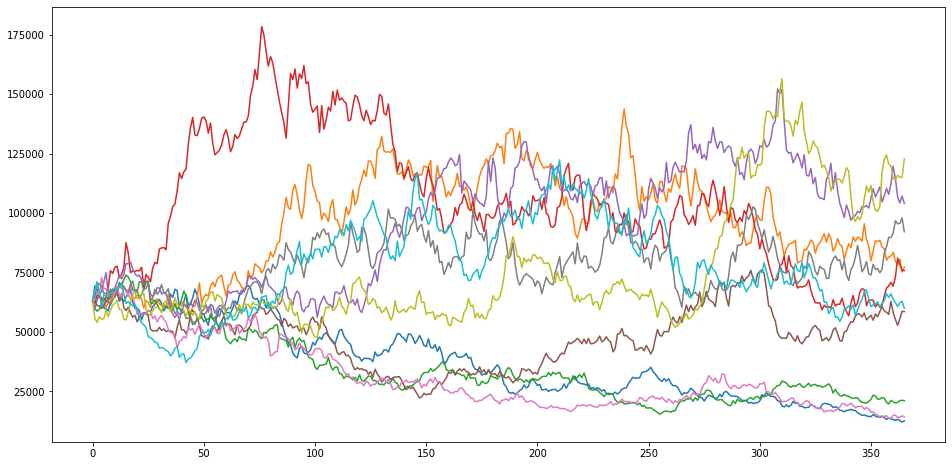

In [58]:
plt.figure(figsize=(16,8))
plt.plot(S[:, :10]);

In [59]:
p = np.maximum(S[-1] - 110,0)

In [60]:
C = np.exp(-r * T) * np.sum(p) / itarions
C

NameError: name 'itarions' is not defined